## Predicting Bike Rental

The goal of this project is to predict the total number of bikes rented in a given hour ie the 'cnt' column of the dataframe. Below are columns of the dataframe with their meaning.

- <b>Instant</b> - A unique sequential ID number for each row
- <b>dteday</b> - The date of the rentals
- <b>season</b> - The season in which the rentals occurred
- <b>yr</b> - The year the rentals occurred
- <b>mnth</b> - The month the rentals occurred
- <b>hr</b> - The hour the rentals occurred
- <b>holiday</b> - Whether or not the day was a holiday
- <b>weekday</b> - The day of the week (as a number, 0 to 7)
- <b>workingday</b> - Whether or not the day was a working day
- <b>weathersit</b> - The weather (as a categorical variable)
- <b>temp</b> - The temperature, on a 0-1 scale
- <b>atemp</b> - The adjusted temperature
- <b>hum</b>- The humidity, on a 0-1 scale
- <b>windspeed</b> - The wind speed, on a 0-1 scale
- <b>casual</b> - The number of casual riders (people who hadn't   previously signed up with the bike sharing program)
- <b>registered</b> - The number of registered riders (people who had already signed up)
- <b>cnt</b> - The total number of bike rentals (casual + registered)

### Reading in the dataframe and displaying it. 

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('bike_rental_hour.csv')

In [3]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


The dataframe displayed above shows that all the data in each column is an numerical value except the <b>'dteday'</b> column. 

### Making a histogram of the <b>'cnt'</b> Column

Below, the histogram of the cnt column was plotted so as to visualize the distribution of total rentals. 


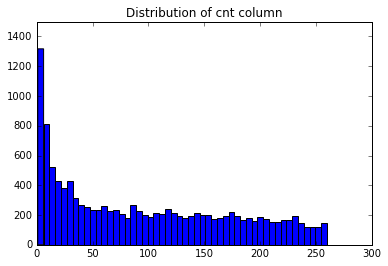

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
ax.hist(df["cnt"],bins = 50, range=(1,260))
ax.set_title('Distribution of cnt column')
ax.set_ylim(0,1500)
plt.show()

The above distribution shows that the frequent number of bike rental each hour is between 1-5 as that bin has the highest frequency of about 1300.

### Checking the correlation

While analyzing a dataset, it is always a good pracitce to check the correlation between the target column and each feature. The table below shows the correlation of each column in the dataframe. 

In [5]:
df.corr()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.404046,0.866014,0.489164,-0.004775,0.014723,0.001357,-0.003416,-0.014198,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379
season,0.404046,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.120206,0.174226,0.178056
yr,0.866014,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495
mnth,0.489164,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.068457,0.122273,0.120638
hr,-0.004775,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,0.014723,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
weekday,0.001357,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.032721,0.021578,0.026900
workingday,-0.003416,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
weathersit,-0.014198,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426
temp,0.136178,0.312025,0.040913,0.201691,0.137603,-0.027340,-0.001795,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772


The correlation values above shows that 'cnt' column correlated very positively with 'hr', 'temp', 'atemp', 'casual' and 'registered' column whereas it correlated negatively with 'holiday', 'weathersit' and 'humidity' column. The correlation of 'registered' and 'casual' column was very high because it is the addition of the values of both columns that resulted to the 'cnt' column value. So, the three columns (casual, registered and cnt) represent same information. 

### Data Transformation

The attempt here is to introduce new information from the existing information (features) so as to enhance the accuracy of models. The 'hr' column has values range of 1 to 24, representing each hr. More information such as morning, afternoon, evening and night was extracted from it and new column called time label was formed as shown below. 

- night has value =  4
- morning has value =  1
- afternoon has value = 2
- evening has value = 3

In [6]:
#function for transforming the hr column to time_label column
def assign_label(hr):
        if  0 <= hr and hr < 6:
            return 4      
        elif (6 <= hr <12):
            return 1
        elif (12 <= hr <18):
            return 2
        else:
            return 3
           

df['time_label'] = df['hr'].apply(assign_label)
df.corr()["cnt"]

instant       0.278379
season        0.178056
yr            0.250495
mnth          0.120638
hr            0.394071
holiday      -0.030927
weekday       0.026900
workingday    0.030284
weathersit   -0.142426
temp          0.404772
atemp         0.400929
hum          -0.322911
windspeed     0.093234
casual        0.694564
registered    0.972151
cnt           1.000000
time_label   -0.378318
Name: cnt, dtype: float64

In [7]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time_label
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,4
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,4
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,4
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,4
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,4


### Preparing the train and test dataset 

Before applying machine learning algorithms, the dataframe is split into train and test dataset. The train dataset contains 80% of the data and test dataset, the remaining 20%.

In [8]:
train = df.sample(frac=0.8, random_state=1)

In [9]:
train.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time_label
15652,15653,2012-10-19,4,1,10,9,0,5,1,2,0.54,0.5152,0.94,0.1045,26,363,389,1
3085,3086,2011-05-13,2,0,5,11,0,5,1,2,0.52,0.5000,0.83,0.1642,56,90,146,1
1684,1685,2011-03-15,1,0,3,19,0,2,1,2,0.34,0.3182,0.71,0.2836,14,138,152,3
10555,10556,2012-03-20,1,1,3,22,0,2,1,1,0.54,0.5152,0.77,0.0000,32,156,188,3
14622,14623,2012-09-06,3,1,9,11,0,4,1,3,0.70,0.6667,0.84,0.1642,10,52,62,1


In [10]:
test = df.loc[~df.index.isin(train.index)]
test.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time_label
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,4
14,15,2011-01-01,1,0,1,14,0,6,0,2,0.46,0.4545,0.72,0.2836,35,71,106,2
15,16,2011-01-01,1,0,1,15,0,6,0,2,0.44,0.4394,0.77,0.2985,40,70,110,2
18,19,2011-01-01,1,0,1,18,0,6,0,3,0.42,0.4242,0.88,0.2537,9,26,35,3
20,21,2011-01-01,1,0,1,20,0,6,0,2,0.40,0.4091,0.87,0.2537,11,25,36,3


In [11]:
features = list(train.columns)
features.remove('dteday')
features.remove('casual')
features.remove('registered')
features.remove('cnt')

features

['instant',
 'season',
 'yr',
 'mnth',
 'hr',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'time_label']

In [12]:
x_train = train[features]
y_train = train['cnt']
x_test = test[features]
y_test = test['cnt']

Some of the features such as 'dteday','casual','registered' and 'cnt' was exempted from the features used for the training and testing. 'dteday' column is a date value which does not make any meaninful contribution to the prediction. On the other hand, 'casual' and 'registered' column carries the same information as cnt, hence the need to ignore them.

### Applying linear regression algorithm

Here, the linear regression was applied to the training set. The model is tested using test dataset. Mean square error and r2 square score was used as metric to determine how well the algorithm performed. 

In [13]:
## Applying linear regression
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [14]:
clf = LinearRegression()
clf.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
y1_pred = clf.predict(x_test)

In [16]:
rmse= mean_squared_error(y_test, y1_pred )
print("The mean square error = ", rmse)

The mean square error =  17052.124871247568


In [27]:
r2_scores_1 = r2_score(y_test,y1_pred)
print('The r2_score = ',r2_scores_1)

The r2_score =  0.46220363568234224


As clearly seen above, the linear regression did a bad job in predicting the number of bike. It is possible
the error is mainly a bias error as the algorithm is relatively an easy one. 

### Applying decision tree regressor algorithm.

This algorithm is more sophisticated than linear regression. It outperformed the linear regression as shown by the mean square error and r2 score metric below. Also, the min_samples_leaf with value 5 produced less error compared to when it is initialize to 3.


In [18]:
from sklearn.tree import DecisionTreeRegressor
clf2 = DecisionTreeRegressor(min_samples_leaf = 5, random_state = 1)
clf2.fit(x_train, y_train)
y21_pred= clf2.predict(x_test)
rmse_d1= mean_squared_error(y_test, y21_pred)
print("The mean square error = ", rmse_d1)

The mean square error =  2743.501061137682


In [25]:
r2_scores_2= r2_score(y_test,y21_pred)
print('The r2_score = ', r2_scores_2)

The r2_score =  0.9134744257784962


In [20]:
clf2 = DecisionTreeRegressor(min_samples_leaf = 3,random_state = 2)
clf2.fit(x_train, y_train)
y22_pred= clf2.predict(x_test)
rmse_d2= mean_squared_error(y_test, y22_pred)
print("The mean square error = ", rmse_d2)

The mean square error =  2884.8132484656694


In [26]:
r2_scores_3 = r2_score(y_test,y22_pred)
print('The r2_score = ',r2_scores_3)

The r2_score =  0.9090176685618687


### Applying Random forest algorithm

Finally, inorder to further boost the prediction accuracy, random forest alogirthm is applied. The results below shows that the error  reduced further and hence an increased accuracy. This algorithm proves to be the best among the three algorithm considered in this project and hence should be used for the predictions. 

In [23]:
# applying random 
from sklearn.ensemble import RandomForestRegressor
clf3 = RandomForestRegressor(n_estimators=150, min_samples_leaf=5, random_state=3)
clf3.fit(x_train, y_train)
y3_pred = clf3.predict(x_test)
rmse_d3 = mean_squared_error(y_test, y3_pred)
print("The mean square error = ", rmse_d3)


The mean square error =  2045.1475091498965


In [28]:
r2_scores_4 = r2_score(y_test,y3_pred)
print('The r2_score = ', r2_scores_4)

The r2_score =  0.9354993642599534
